In [42]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from glob import glob
from basketball_reference_web_scraper import client
from basketball_reference_web_scraper.data import Location
from basketball_reference_web_scraper.data import OutputType
sns.set()

In [34]:
# Pulling data into CSVs 

client.regular_season_player_box_scores(
    player_identifier="lillada01", 
    season_end_year=2013, 
    output_type=OutputType.CSV, 
    output_file_path="Data/2012_2013_damian_lillard_regular_season_box_scores.csv")

client.regular_season_player_box_scores(
    player_identifier="lillada01", 
    season_end_year=2014, 
    output_type=OutputType.CSV, 
    output_file_path="Data/2013_2014_damian_lillard_regular_season_box_scores.csv")

client.regular_season_player_box_scores(
    player_identifier="lillada01", 
    season_end_year=2015, 
    output_type=OutputType.CSV, 
    output_file_path="Data/2014_2015_damian_lillard_regular_season_box_scores.csv")

client.regular_season_player_box_scores(
    player_identifier="lillada01", 
    season_end_year=2016, 
    output_type=OutputType.CSV, 
    output_file_path="Data/2015_2016_damian_lillard_regular_season_box_scores.csv")

client.regular_season_player_box_scores(
    player_identifier="lillada01", 
    season_end_year=2017, 
    output_type=OutputType.CSV, 
    output_file_path="Data/2016_2017_damian_lillard_regular_season_box_scores.csv")

client.regular_season_player_box_scores(
    player_identifier="lillada01", 
    season_end_year=2018, 
    output_type=OutputType.CSV, 
    output_file_path="Data/2017_2018_damian_lillard_regular_season_box_scores.csv")

client.regular_season_player_box_scores(
    player_identifier="lillada01", 
    season_end_year=2019, 
    output_type=OutputType.CSV, 
    output_file_path="Data/2018_2019_damian_lillard_regular_season_box_scores.csv")

client.regular_season_player_box_scores(
    player_identifier="lillada01", 
    season_end_year=2020, 
    output_type=OutputType.CSV, 
    output_file_path="Data/2019_2020_damian_lillard_regular_season_box_scores.csv")

In [46]:
# Merging all CSVs

all_files = sorted(glob('Data/*_damian_lillard_regular_season_box_scores.csv'))

lillard_df = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in all_files), ignore_index = True )

lillard_df.head(10)

,date,points_scored,plus_minus,team,location,opponent,outcome,seconds_played,made_field_goals,attempted_field_goals,...,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,game_score,filename
0,2012-10-31,23,16,PORTLAND TRAIL BLAZERS,HOME,LOS ANGELES LAKERS,WIN,2099,7,17,...,8,0,3,11,1,0,6,2,16.7,Data/2012_2013_damian_lillard_regular_season_b...
1,2012-11-02,21,-9,PORTLAND TRAIL BLAZERS,AWAY,OKLAHOMA CITY THUNDER,LOSS,2253,9,19,...,1,1,2,7,1,0,2,1,16.1,Data/2012_2013_damian_lillard_regular_season_b...
2,2012-11-03,20,10,PORTLAND TRAIL BLAZERS,AWAY,HOUSTON ROCKETS,WIN,2538,8,15,...,2,1,5,9,0,0,3,0,17.8,Data/2012_2013_damian_lillard_regular_season_b...
3,2012-11-05,13,-12,PORTLAND TRAIL BLAZERS,AWAY,DALLAS MAVERICKS,LOSS,1967,2,13,...,8,1,2,5,1,0,1,2,8.7,Data/2012_2013_damian_lillard_regular_season_b...
4,2012-11-08,16,-9,PORTLAND TRAIL BLAZERS,HOME,LOS ANGELES CLIPPERS,LOSS,2481,6,13,...,4,1,1,4,3,0,3,2,11.5,Data/2012_2013_damian_lillard_regular_season_b...
5,2012-11-10,20,1,PORTLAND TRAIL BLAZERS,HOME,SAN ANTONIO SPURS,LOSS,2269,8,16,...,1,1,2,6,2,0,4,3,13.9,Data/2012_2013_damian_lillard_regular_season_b...
6,2012-11-12,12,-20,PORTLAND TRAIL BLAZERS,HOME,ATLANTA HAWKS,LOSS,2316,5,18,...,0,1,2,2,2,1,4,3,1.6,Data/2012_2013_damian_lillard_regular_season_b...
7,2012-11-13,22,24,PORTLAND TRAIL BLAZERS,AWAY,SACRAMENTO KINGS,WIN,2110,7,10,...,4,1,1,9,0,0,4,2,19.9,Data/2012_2013_damian_lillard_regular_season_b...
8,2012-11-16,27,10,PORTLAND TRAIL BLAZERS,HOME,HOUSTON ROCKETS,WIN,2535,9,18,...,6,0,5,5,2,0,4,2,20.2,Data/2012_2013_damian_lillard_regular_season_b...
9,2012-11-18,16,-5,PORTLAND TRAIL BLAZERS,HOME,CHICAGO BULLS,WIN,1935,7,13,...,2,0,2,3,3,0,2,2,12.2,Data/2012_2013_damian_lillard_regular_season_b...


In [48]:
# Creating day of the week column to help break up data using pandas.Series.dt.day_name to help speed up the process

lillard_df['date'] = pd.to_datetime(lillard_df['date'])
lillard_df['day_of_week'] = lillard_df['date'].dt.day_name()


In [49]:
# Cleaning the data frame

clean_lillard = lillard_df.rename(columns={'day_of_week': "Day of Week"})

In [50]:
# Creating new data frame with the information I need

# Identifying variables
day_group = clean_lillard.groupby('Day of Week')
day_count = day_group['date'].nunique()
day_ppg = day_group['points_scored'].mean()

# Creating the data frame
lillard_day_df = pd.DataFrame({'# of Games': day_count,
                       'Points Per Game': day_ppg})

lillard_day_df

,# of Games,Points Per Game
Day of Week,,
Friday,100,25.340000
Monday,78,23.923077
Saturday,99,24.181818
Sunday,81,24.728395
Thursday,63,24.349206
Tuesday,86,24.988372
Wednesday,108,22.287037


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

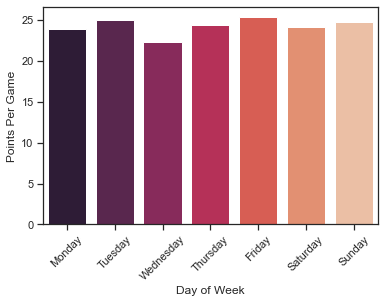

In [51]:
# Creating bar plot with Seaborn

sns.set_style("ticks")
barplot_2018 = sns.barplot(x='Day of Week', y='Points Per Game', palette="rocket", 
                           order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                           data=lillard_day_df.reset_index())
plt.xticks(rotation=45, fontweight='light')